In [1]:
#https://mode.com/sql-tutorial/introduction-to-sql/
#https://www.analyticsvidhya.com/blog/2020/07/8-sql-techniques-data-analysis-analytics-data-science/

## 1. List all the matches between teams, if matches are played once

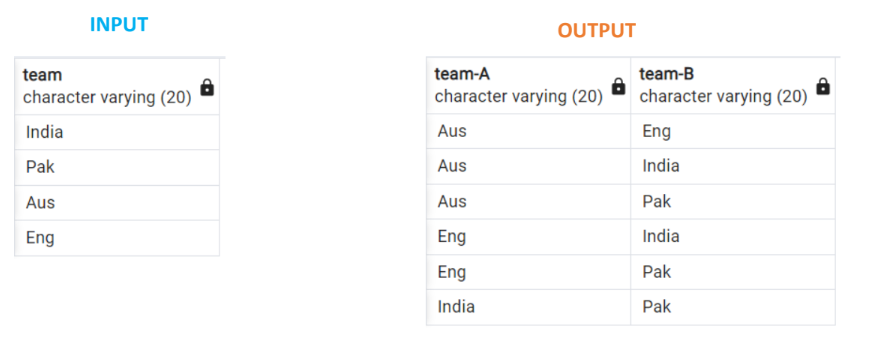

In [ ]:
#Sol:

WITH CTE AS 
( SELECT *, ROW_NUMBER() OVER(ORDER BY team ASC)
AS id FROM match )
SELECT
 a.team as "team-A", 
 b.team as "team-B"
FROM CTE as a join CTE as b ON a.team <> b.team
WHERE a.id < b.id;

## 2. write a query to get the output

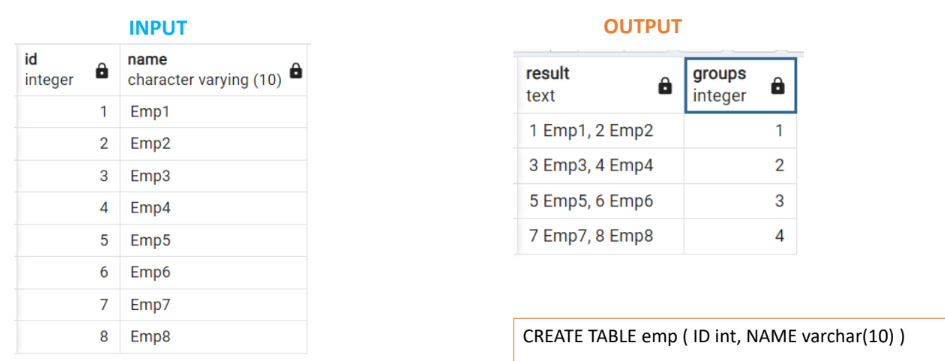

In [ ]:
#Sol:

WITH CTE AS
( SELECT CONCAT(ID , ' ', NAME) AS con_name, 
NTILE(4) OVER(ORDER BY ID ASC) AS groups 
FROM emp )
SELECT 
 STRING_AGG(con_name, ', ') as result, 
 groups
FROM CTE
GROUP BY groups
ORDER BY groups

## 3. Remove duplicate journey from source to target or vise versa

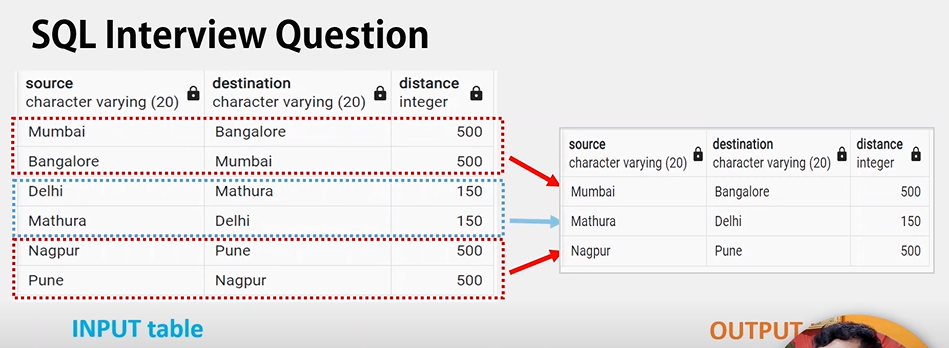|

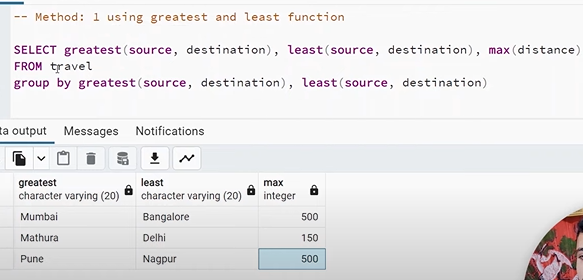

In [ ]:
#Sol: Method 2

WITH cts AS (
SELECT *,row_number() over() AS SNo FROM travel
)
SELECT t1.*
FROM cte AS t1
join cte AS t2
ON t1.source=t2.destination AND t1.SNo < t2.SNo

In [6]:
#Sol: Method 3
SELECT * 
FROM travel t1
WHERE NOT EXISTS (SELECT * FROM travel t2 WHERE t1.source=t2.destination AND t2.source=t1.destination AND t1.destination > t2.destination )

## 4. What is order of execution in sql?

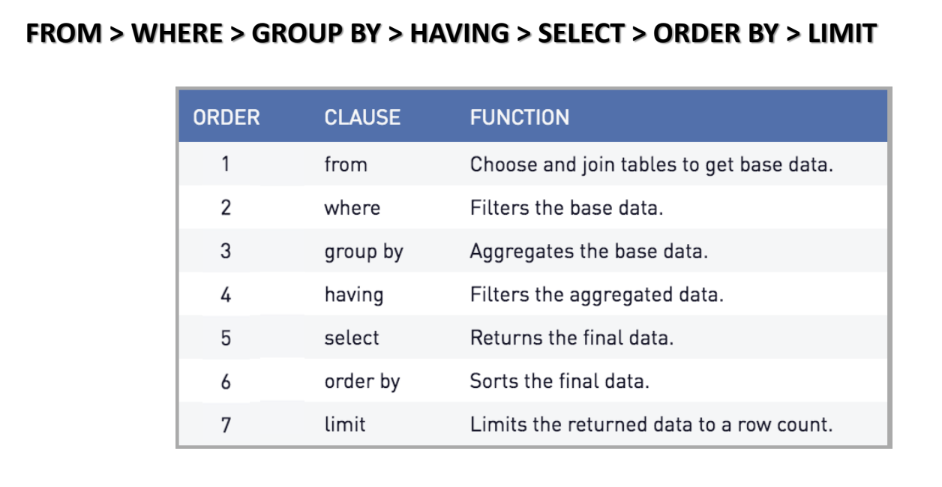

In [ ]:
Example:
SELECT category, AVG(sales) AS avg_sales
FROM SalesData
WHERE year > 2020
GROUP BY category
HAVING COUNT(*) > 10
ORDER BY avg_sales DESC
LIMIT 3

## 5. Find monthly sales and sort it by desc order

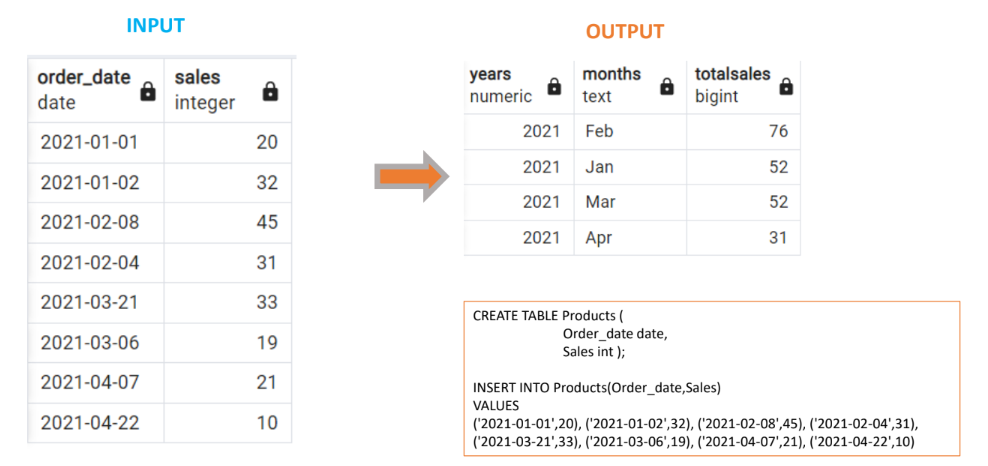

In [ ]:
#Solution PostgreSQL:

SELECT extract(year from Order_date) as years, to_char(Order_date,'Mon') as months,
sum(Sales) as TotalSales
FROM Products
GROUP BY 1,2
ORDER BY TotalSales DESC

#Solution MySql:

SELECT YEAR(Order_date) AS Years, MONTH(Order_date) AS Months, SUM(Sales) AS TotalSales
FROM Products
GROUP BY YEAR(Order_date),MONTH(Order_date)
ORDER BY TotalSales DESC;

## 6. Find the candidates best suited for an open Data Science job. Find candidates who are proficient in Python, SQL, and Power BI. Write a query to list the candidates who possess all of the required skills for the job. Sort the output by candidate ID in ascending order.

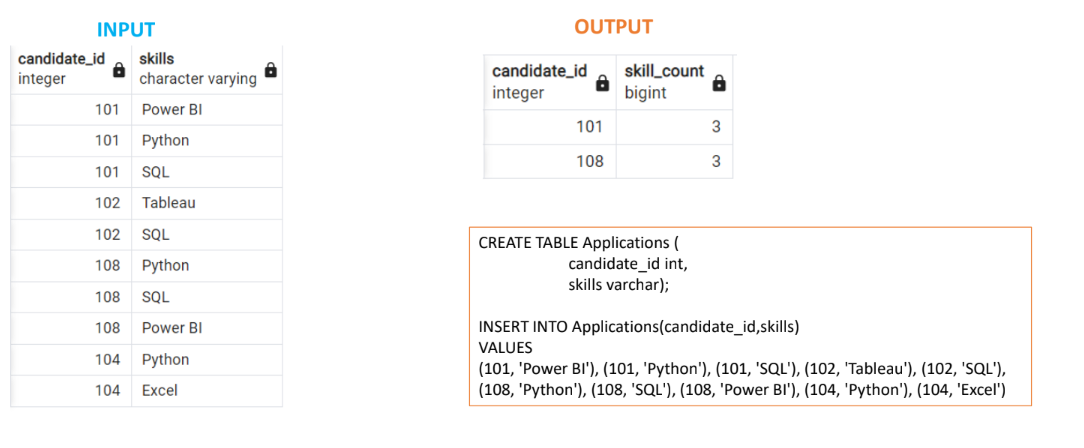

In [ ]:
#Sol:

select candidate_id, count(skills) as skill_count
from Applications
where skills IN ('Python', 'SQL', 'Power BI')
group by candidate_id
having count(skills) = 3
order by candidate_id

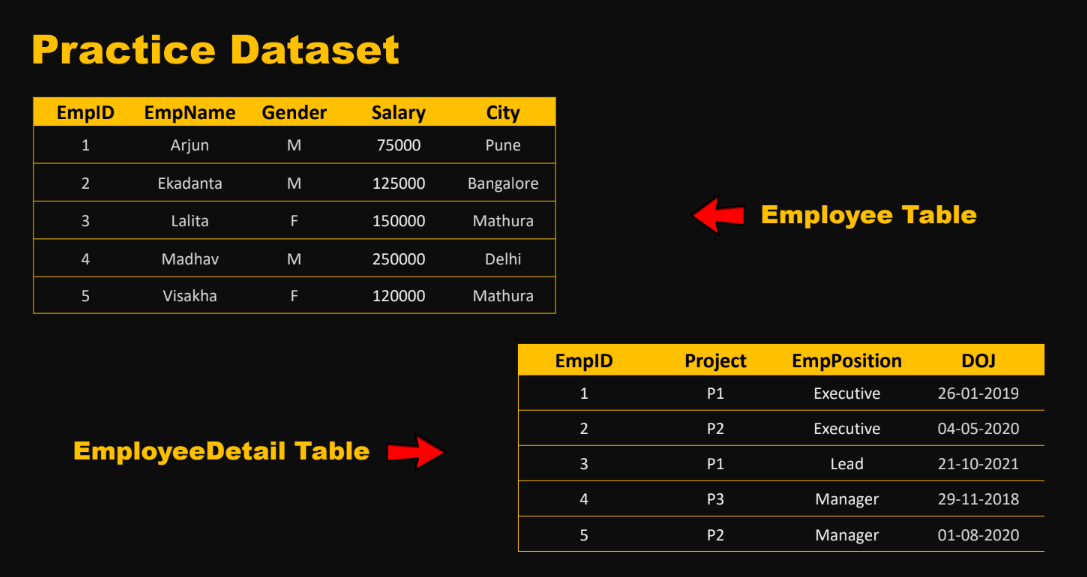

## 7. Find the list of employees whose salary ranges between 2L to 3L.

In [ ]:
SELECT EmpName, Salary 
FROM Employee
WHERE Salary > 200000 AND Salary < 300000

--- OR –--

SELECT EmpName, Salary 
FROM Employee
WHERE Salary BETWEEN 200000 AND 300000

## 8. Write a query to retrieve the list of employees from the same city.

In [ ]:
SELECT E1.EmpID, E1.EmpName, E1.City
FROM Employee E1, Employee E2
WHERE E1.City = E2.City AND E1.EmpID != E2.EmpID

## 9. Query to find the null values in the Employee table.

In [ ]:
SELECT * FROM Employee
WHERE EmpID IS NULL

## 10. Query to find the cumulative sum of employee’s salary.

In [ ]:
SELECT 
EmpID, 
Salary, 
SUM(Salary) OVER (ORDER BY EmpID) AS CumulativeSum
FROM Employee

## 11. What’s the male and female employees ratio.

In [ ]:
SELECT
(COUNT(*) FILTER (WHERE Gender = 'M') * 100.0 / COUNT(*)) AS MalePct,
(COUNT(*) FILTER (WHERE Gender = 'F') * 100.0 / COUNT(*)) AS FemalePct
FROM Employee;

## 12. Write a query to fetch 50% records from the Employee table.

In [ ]:
SELECT * FROM Employee
WHERE EmpID <= (SELECT COUNT(EmpID)/2 from Employee)

## 13. Query to fetch the employee’s salary but replace the LAST 2 digits with ‘XX’ i.e 12345 will be 123XX

In [ ]:
SELECT Salary,
CONCAT(SUBSTRING(Salary::text, 1, LENGTH(Salary::text)-2), 'XX') as masked_number
FROM Employee

--- OR –--

SELECT Salary, CONCAT(LEFT(CAST(Salary AS text), LENGTH(CAST(Salary AS text))-2), 'XX')
AS masked_number
FROM Employee

In [ ]:
#Mysql

SELECT Salary,
CONCAT(LEFT(Salary, LEN(Salary)-2), 'XX') as masked_salary
FROM Employee

## 14. Write a query to fetch even and odd rows from Employee table.

In [ ]:
---Fetch even rows
SELECT * FROM
(SELECT *, ROW_NUMBER() OVER(ORDER BY EmpId) AS
RowNumber
FROM Employee) AS Emp
WHERE Emp.RowNumber % 2 = 0

---Fetch odd rows
SELECT * FROM
(SELECT *, ROW_NUMBER() OVER(ORDER BY EmpId) AS
RowNumber
FROM Employee) AS Emp
WHERE Emp.RowNumber % 2 = 1

## 15. Write a query to find all the Employee names whose name:
## • Begin with ‘A’
## • Contains ‘A’ alphabet at second place
## • Contains ‘Y’ alphabet at second last place
## • Ends with ‘L’ and contains 4 alphabets
## • Begins with ‘V’ and ends with ‘A’

In [ ]:
SELECT * FROM Employee WHERE EmpName LIKE 'A%';
SELECT * FROM Employee WHERE EmpName LIKE '_a%';
SELECT * FROM Employee WHERE EmpName LIKE '%y_';
SELECT * FROM Employee WHERE EmpName LIKE '____l';
SELECT * FROM Employee WHERE EmpName LIKE 'V%a'

## 16. Write a query to find the list of Employee names which is:
## • starting with vowels (a, e, i, o, or u), without duplicates
## • ending with vowels (a, e, i, o, or u), without duplicates
## • starting & ending with vowels (a, e, i, o, or u), without duplicates

In [ ]:
#MySQL

SELECT DISTINCT EmpName
FROM Employee
WHERE LOWER(EmpName) REGEXP '^[aeiou]'

SELECT DISTINCT EmpName
FROM Employee
WHERE LOWER(EmpName) REGEXP '[aeiou]$'

SELECT DISTINCT EmpName
FROM Employee
WHERE LOWER(EmpName) REGEXP '^[aeiou].*[aeiou]$'

## 17. Find Nth highest salary from employee table with and without using the TOP/LIMIT keywords.

In [ ]:
#LIMIT:
SELECT Salary FROM Employee
ORDER BY Salary DESC
LIMIT 1 OFFSET N-1

#TOP:
SELECT TOP 1 Salary
FROM Employee
WHERE Salary < (
SELECT MAX(Salary) FROM Employee)
AND Salary NOT IN (
SELECT TOP 2 Salary
FROM Employee
ORDER BY Salary DESC)
ORDER BY Salary DESC;

## 18. Write a query to find and remove duplicate records from a table.

In [ ]:
SELECT EmpID, EmpName, gender, Salary, city,
COUNT(*) AS duplicate_count
FROM Employee
GROUP BY EmpID, EmpName, gender, Salary, city
HAVING COUNT(*) > 1;

## 19. Query to retrieve the list of employees working in same project.

In [ ]:
WITH CTE AS

(SELECT e.EmpID, e.EmpName, ed.Project
FROM Employee AS e
INNER JOIN EmployeeDetail AS ed
ON e.EmpID = ed.EmpID)

SELECT c1.EmpName, c2.EmpName, c1.project
FROM CTE c1, CTE c2
WHERE c1.Project = c2.Project AND c1.EmpID != c2.EmpID AND c1.EmpID < c2.EmpID

## 20. Show the employee with the highest salary for each project

In [ ]:
WITH CTE AS
(SELECT project, EmpName, salary,
ROW_NUMBER() OVER (PARTITION BY project ORDER BY salary DESC) AS row_rank
FROM Employee AS e
INNER JOIN EmployeeDetail AS ed
ON e.EmpID = ed.EmpID)

SELECT project, EmpName, salary
FROM CTE
WHERE row_rank = 1;

## 21. Query to find the total count of employees joined each year

In [ ]:
SELECT EXTRACT('year' FROM doj) AS JoinYear, COUNT(*) AS EmpCount
FROM Employee AS e
INNER JOIN EmployeeDetail AS ed ON e.EmpID = ed.EmpID
GROUP BY JoinYear
ORDER BY JoinYear ASC

## 22. Create 3 groups based on salary col, salary less than 1L is low, between 1 - 2L is medium and above 2L is High

In [ ]:
SELECT EmpName, Salary,
CASE
WHEN Salary > 200000 THEN 'High'
WHEN Salary >= 100000 AND Salary <= 200000 THEN 'Medium'
ELSE 'Low'
END AS SalaryStatus
FROM Employee

## 23. Query to pivot the data in the Employee table and retrieve the total salary for each city. The result should display the EmpID, EmpName, and separate columns for each city (Mathura, Pune, Delhi), containing the corresponding total salary.

In [ ]:
SELECT
EmpID,
EmpName,
SUM(CASE WHEN City = 'Mathura' THEN Salary END) AS "Mathura",
SUM(CASE WHEN City = 'Pune' THEN Salary END) AS "Pune",
SUM(CASE WHEN City = 'Delhi' THEN Salary END) AS "Delhi"
FROM Employee
GROUP BY EmpID, EmpName;